# MedSAM 3-channel version: DWI, ADC and DifDif

In [1]:
#channels = "1C=DWI"
#channels = "3C=DWI_ADC_b0"
channels = "3C=DWI_ADC_DifDif"

In [2]:
# Loads all methods and data for testing on JAS
from methods_for_testing_MedSAM import *

/home/rosengaard/miniforge3/envs/medsam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/rosengaard/miniforge3/envs/medsam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Subject: 1
Optimizing level 0 [max iter: 0]
Slice 1 of 10
Dice for slice: 0.435


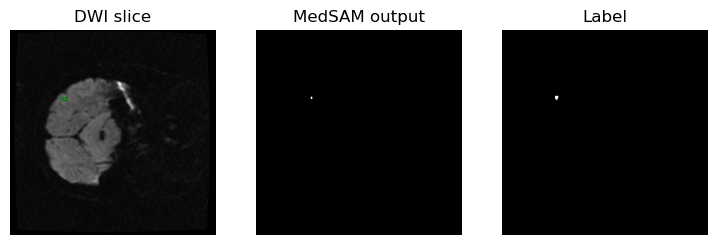

Slice 2 of 10
Dice for slice: 0.192


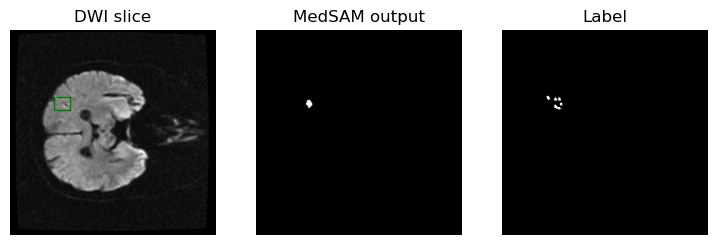

Slice 3 of 10
Dice for slice: 0.739


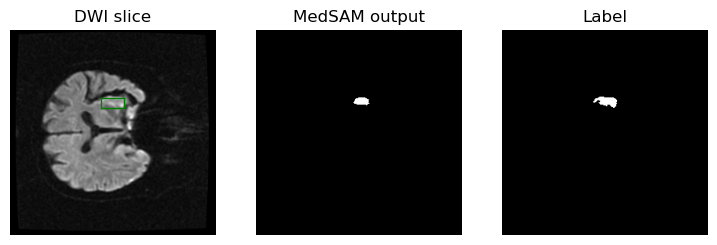

Slice 4 of 10
Dice for slice: 0.802


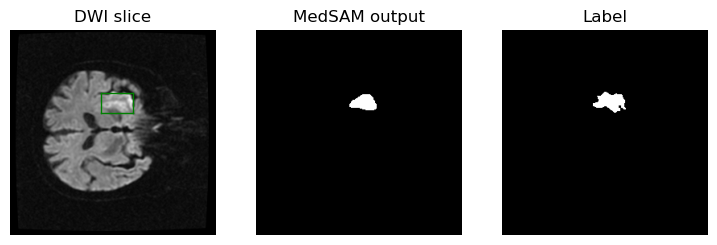

Slice 5 of 10
Dice for slice: 0.419


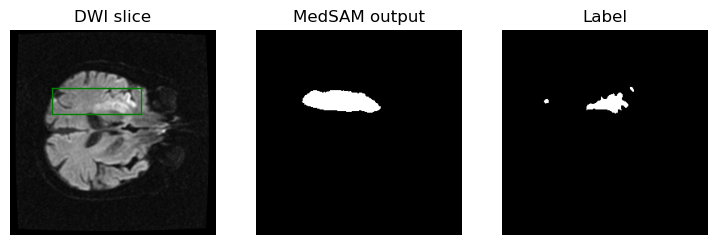

Slice 6 of 10
Dice for slice: 0.513


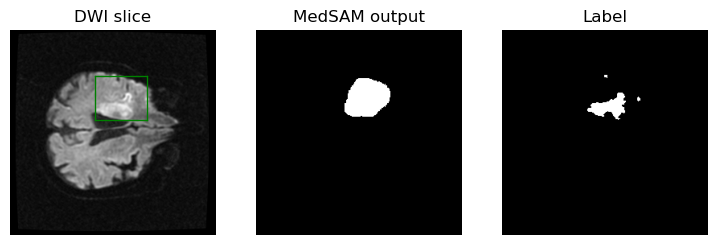

Slice 7 of 10
Dice for slice: 0.499


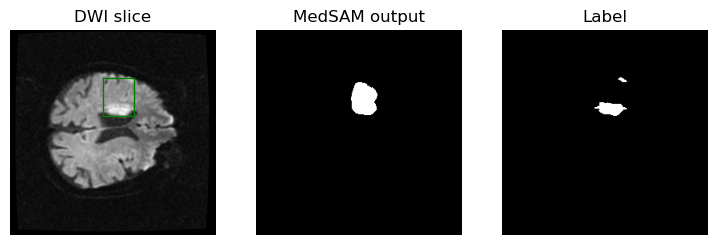

Slice 8 of 10
Dice for slice: 0.0


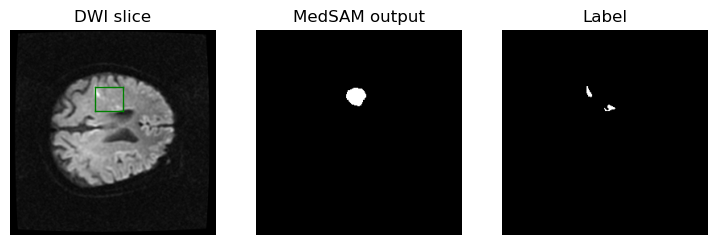

Slice 9 of 10
Dice for slice: 0.086


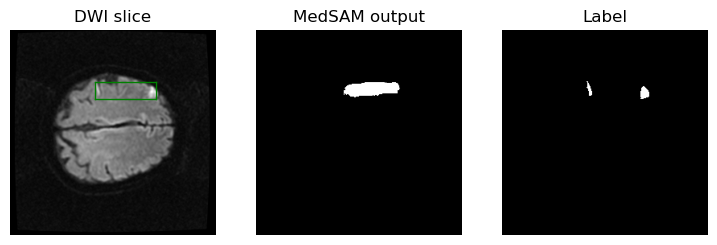

Slice 10 of 10
Dice for slice: 0.466


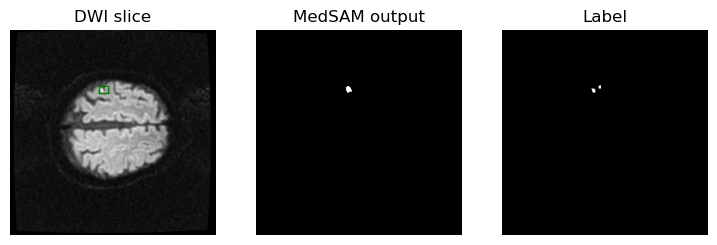

Mean dice for subject: 0.415
_____________________________
Subject: 2
Optimizing level 0 [max iter: 0]
Slice 1 of 1
Dice for slice: 0.57


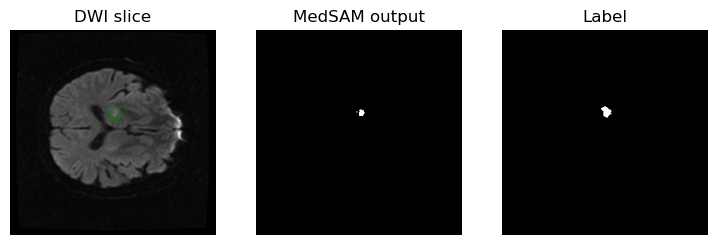

Mean dice for subject: 0.57
_____________________________
Subject: 3
Optimizing level 0 [max iter: 0]
Slice 1 of 10
Dice for slice: 0.644


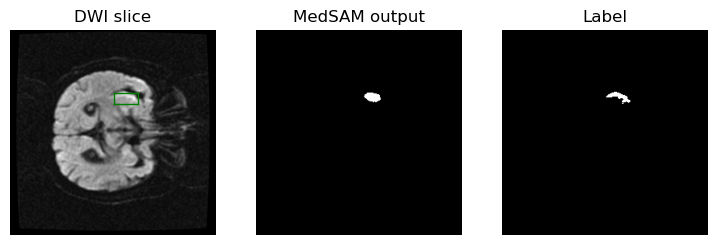

Slice 2 of 10
Dice for slice: 0.517


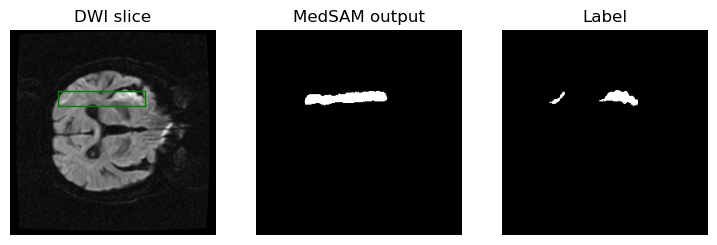

Slice 3 of 10
Dice for slice: 0.582


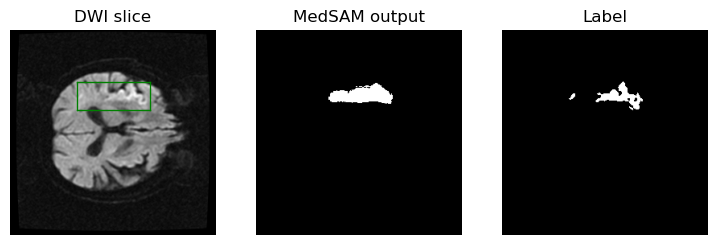

Slice 4 of 10
Dice for slice: 0.608


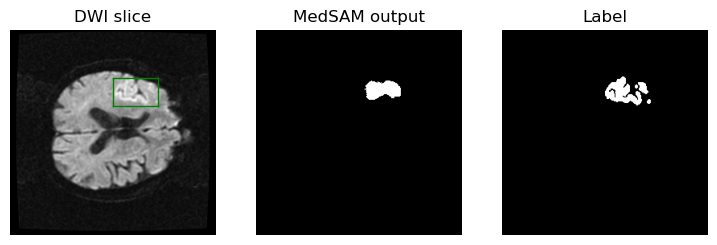

Slice 5 of 10
Dice for slice: 0.596


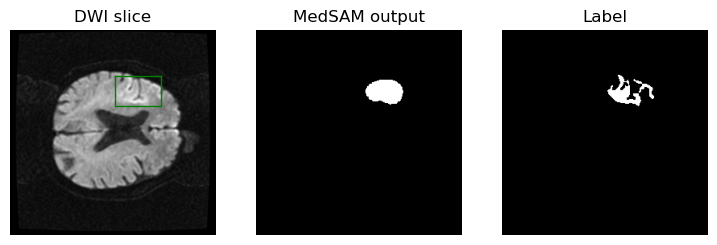

Slice 6 of 10
Dice for slice: 0.613


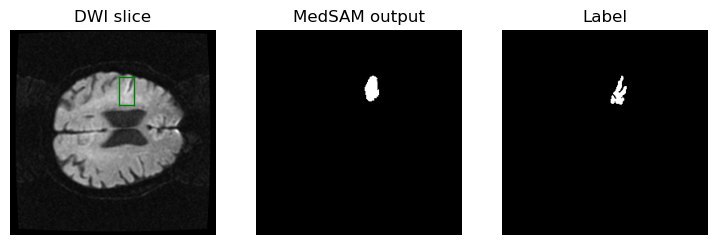

Slice 7 of 10
Dice for slice: 0.351


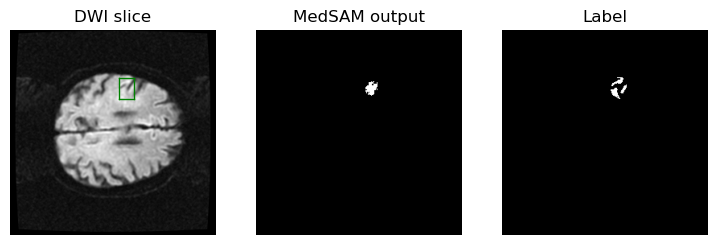

Slice 8 of 10
Dice for slice: 0.54


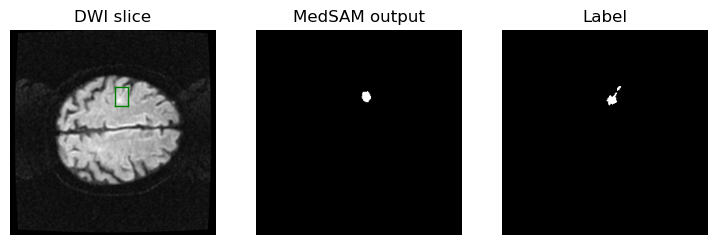

Slice 9 of 10
Dice for slice: 0.089


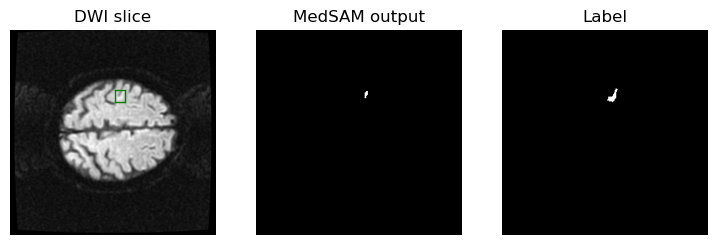

Slice 10 of 10
Dice for slice: 0.588


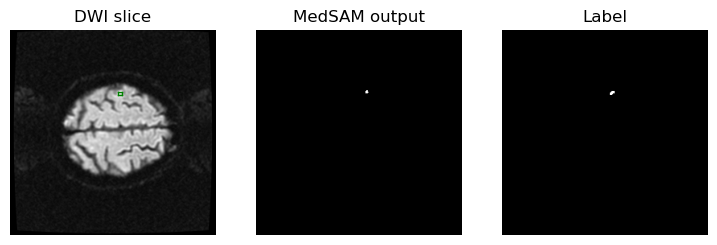

Mean dice for subject: 0.513
_____________________________
Subject: 4
Optimizing level 0 [max iter: 0]
Slice 1 of 10
Dice for slice: 0.768


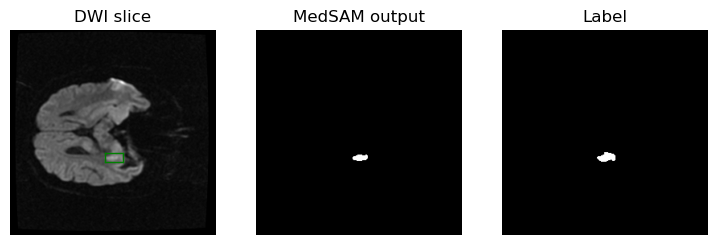

Slice 2 of 10
Dice for slice: 0.634


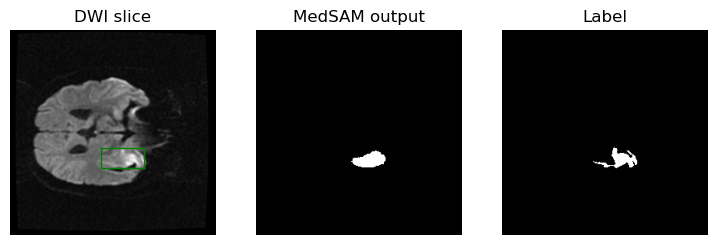

Slice 3 of 10
Dice for slice: 0.693


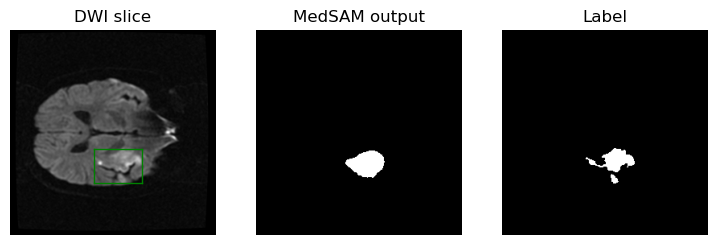

Slice 4 of 10
Dice for slice: 0.872


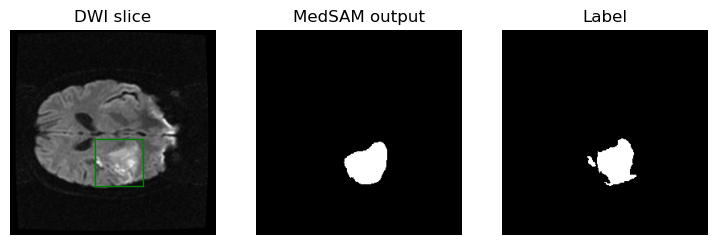

Slice 5 of 10
Dice for slice: 0.857


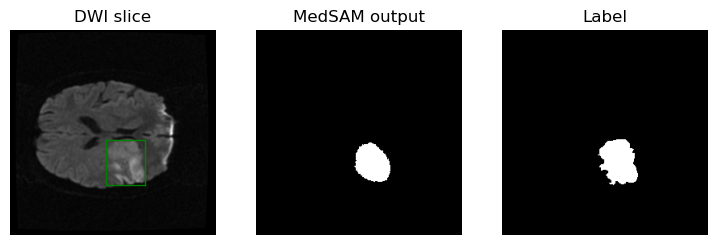

Slice 6 of 10
Dice for slice: 0.805


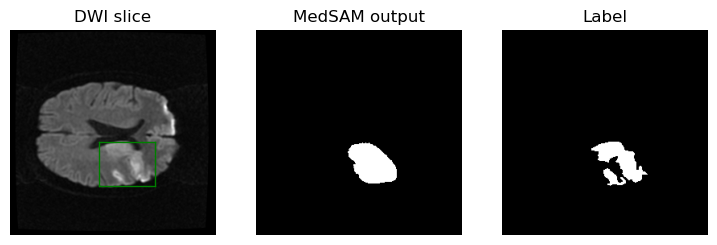

Slice 7 of 10
Dice for slice: 0.76


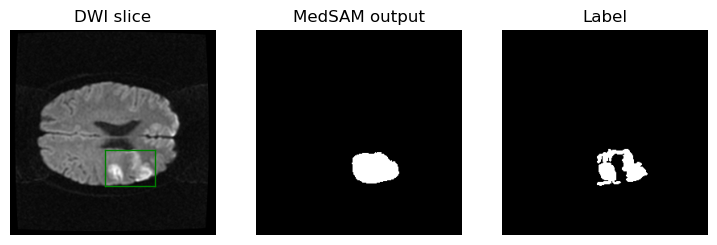

Slice 8 of 10
Dice for slice: 0.383


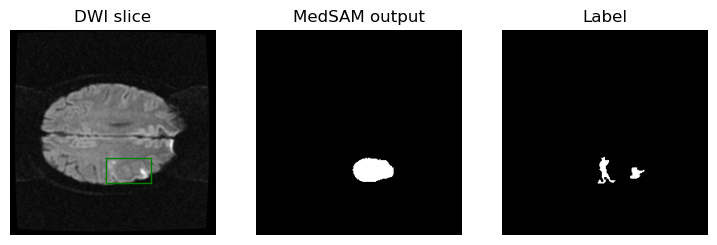

Slice 9 of 10
Dice for slice: 0.744


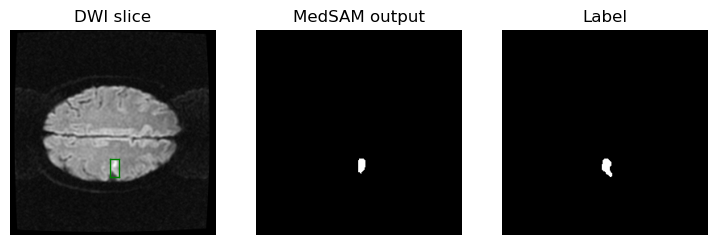

Slice 10 of 10
Dice for slice: 0.352


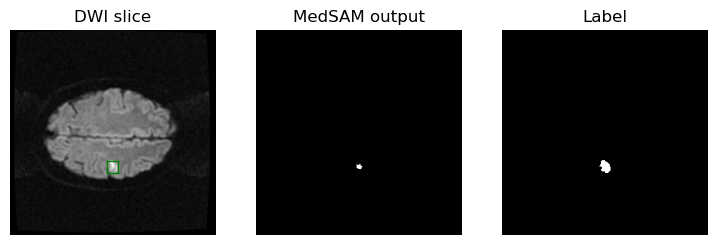

Mean dice for subject: 0.687
_____________________________
Subject: 5
Optimizing level 0 [max iter: 0]
Slice 1 of 4
Dice for slice: 0.712


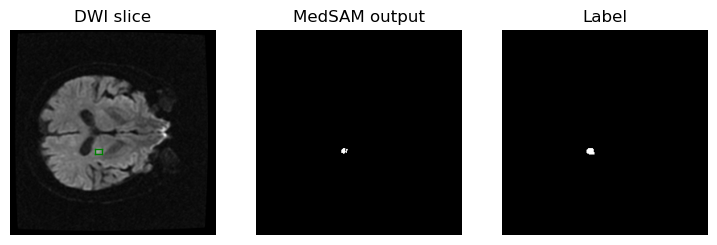

Slice 2 of 4
Dice for slice: 0.836


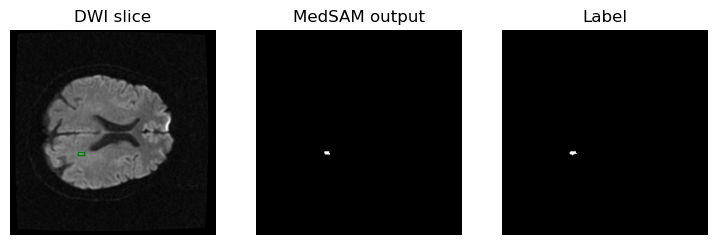

Slice 3 of 4
Dice for slice: 0.745


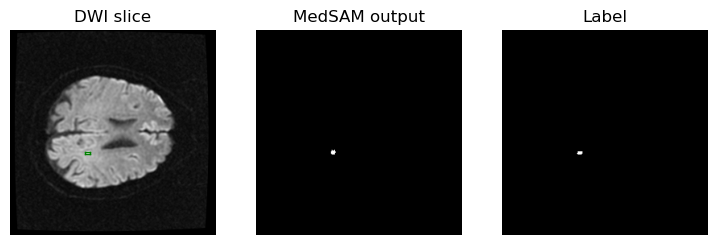

Slice 4 of 4
Dice for slice: 0.793


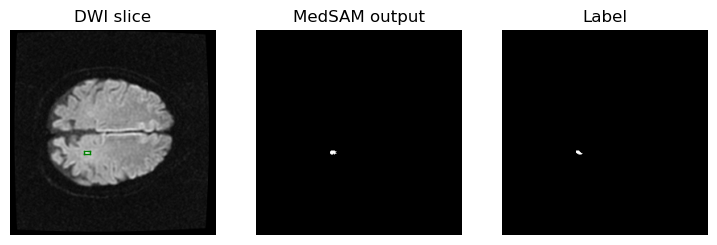

Mean dice for subject: 0.772
_____________________________
Subject: 6
Optimizing level 0 [max iter: 0]
Slice 1 of 7
Dice for slice: 0.689


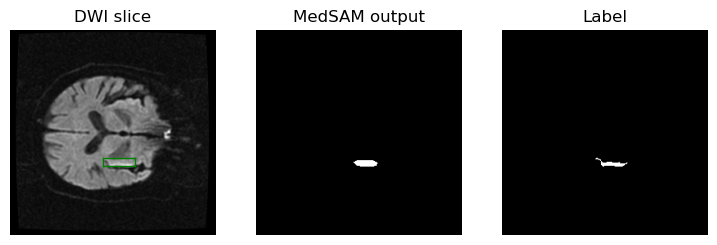

Slice 2 of 7
Dice for slice: 0.643


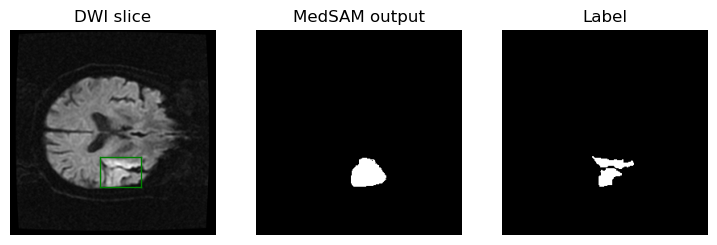

Slice 3 of 7
Dice for slice: 0.695


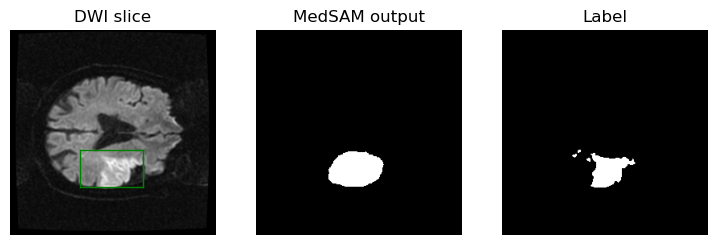

Slice 4 of 7
Dice for slice: 0.721


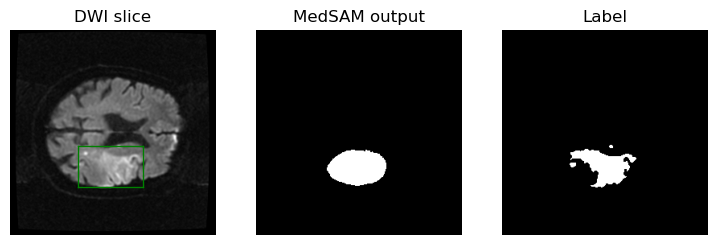

Slice 5 of 7
Dice for slice: 0.616


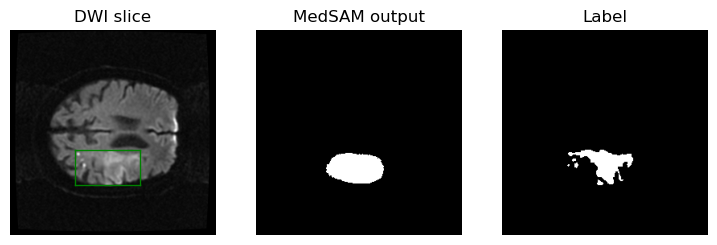

Slice 6 of 7
Dice for slice: 0.332


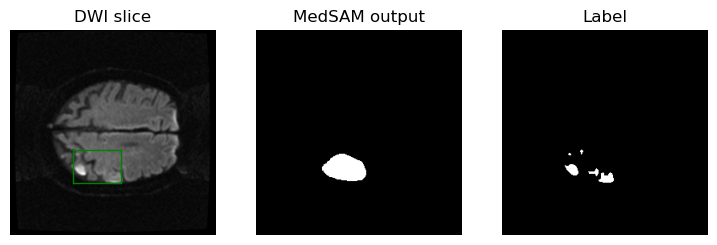

Slice 7 of 7
Dice for slice: 0.165


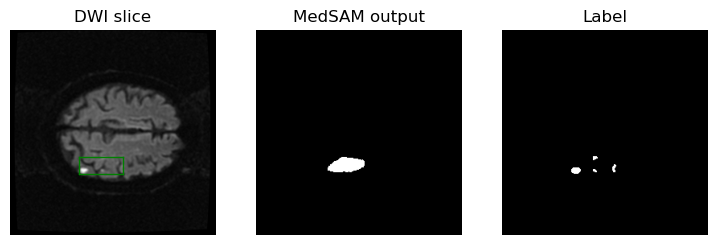

Mean dice for subject: 0.552
_____________________________
Subject: 7
Optimizing level 0 [max iter: 0]
Slice 1 of 6
Dice for slice: 0.621


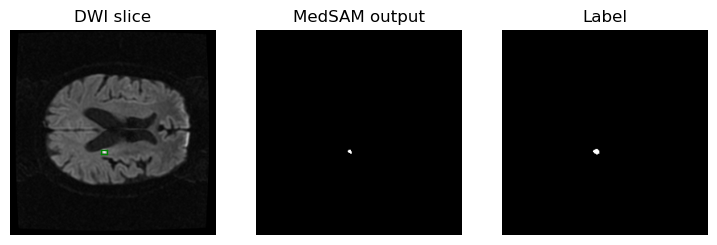

Slice 2 of 6
Dice for slice: 0.815


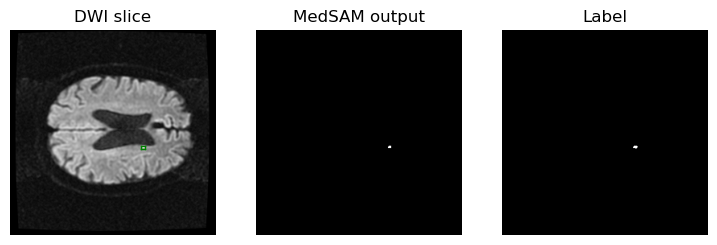

Slice 3 of 6
Dice for slice: 0.4


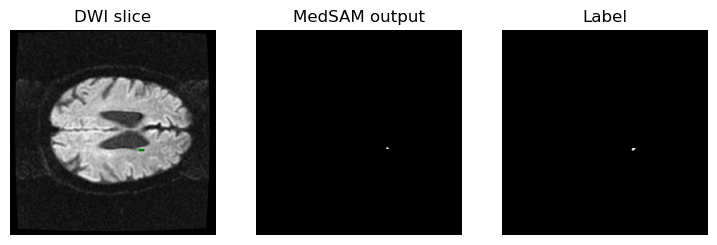

Slice 4 of 6
Dice for slice: 0.52


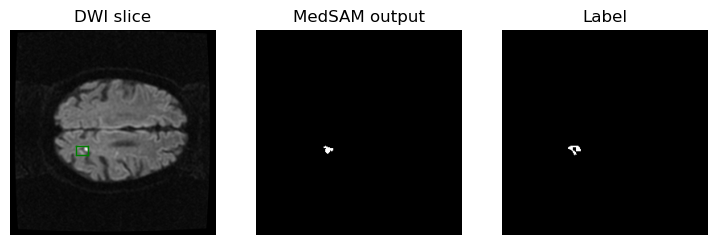

Slice 5 of 6
Dice for slice: 0.049


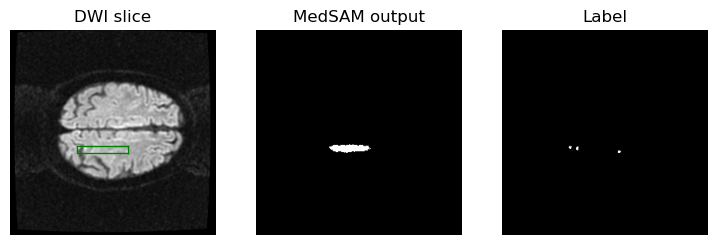

Slice 6 of 6
Dice for slice: 0.0


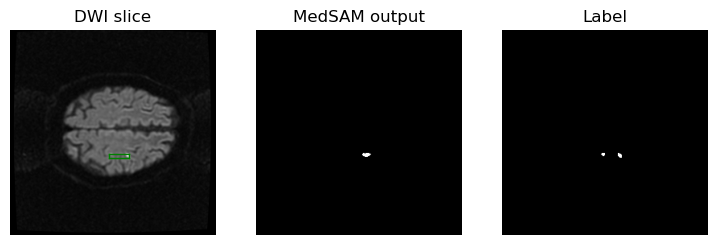

Mean dice for subject: 0.401
_____________________________
Subject: 8
Optimizing level 0 [max iter: 0]
Slice 1 of 10
Dice for slice: 0.384


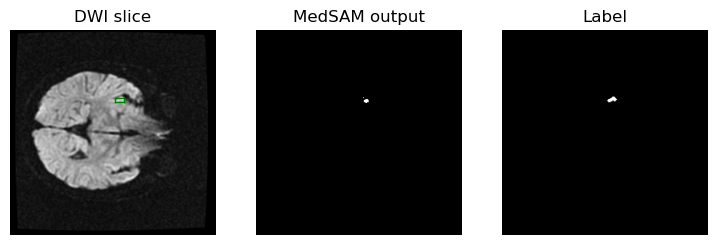

Slice 2 of 10
Dice for slice: 0.721


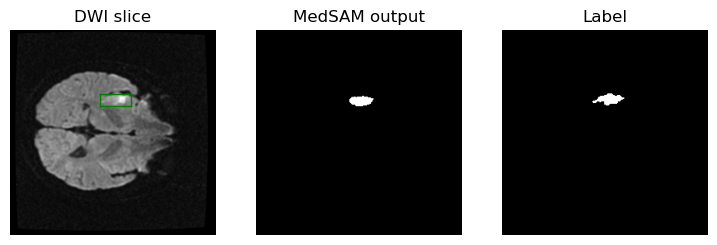

Slice 3 of 10
Dice for slice: 0.809


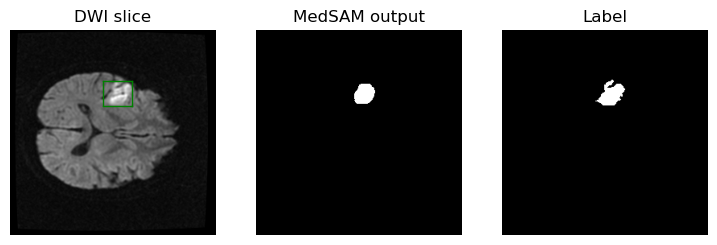

Slice 4 of 10
Dice for slice: 0.831


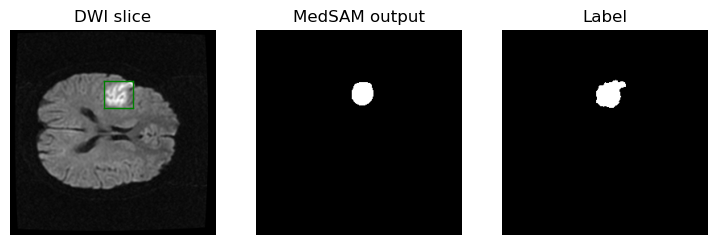

Slice 5 of 10
Dice for slice: 0.751


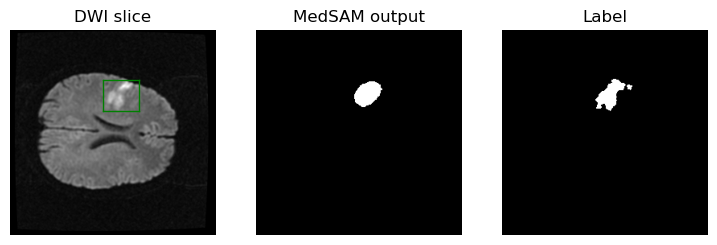

Slice 6 of 10
Dice for slice: 0.484


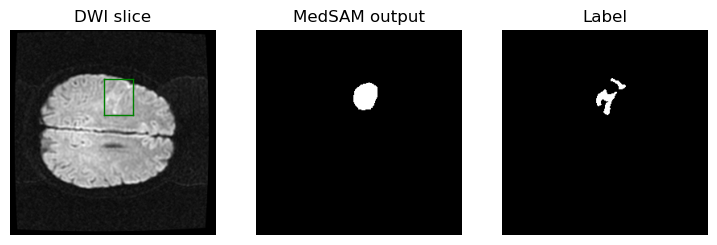

Slice 7 of 10
Dice for slice: 0.71


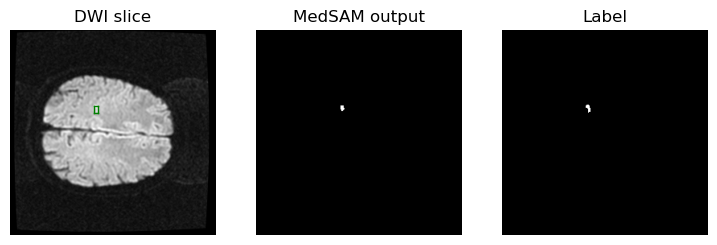

Slice 8 of 10
Dice for slice: 0.667


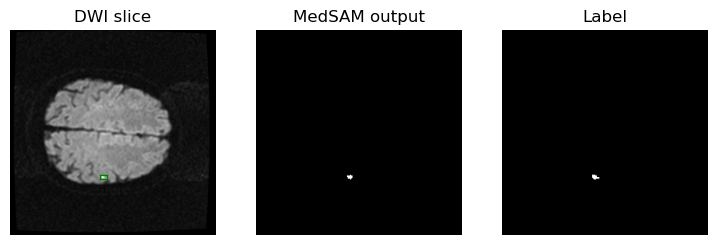

Slice 9 of 10
Dice for slice: 0.526


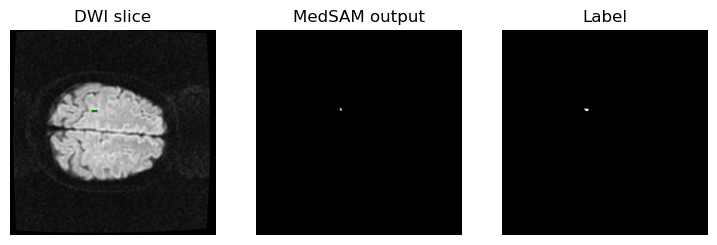

Slice 10 of 10
Dice for slice: 0.533


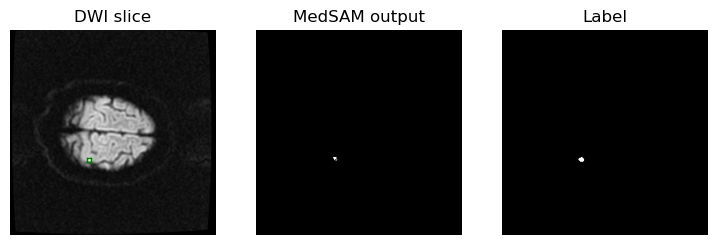

Mean dice for subject: 0.642
_____________________________
__________________________________________________________________
Mean dice for each subject: [0.41509118431853625, 0.569620253164557, 0.5128473342945371, 0.6866907078200469, 0.7715258963484115, 0.5516839200273428, 0.4007340375814085, 0.6415591314792591]

Mean dice for all subjects: 0.5687190581292624


In [3]:
#Test loop
model = MSSD(medsam_model)
Avg_Dice_subjects = []
Dice_for_subjects = []
for idx in range(0,len(data)):
    dice_score_vol = []
    print('Subject:',idx+1)

    #Load data:
    DWI_path, ADC_path, b0_path, label_path = data[idx]
    input_vol = get_volume(DWI_path, ADC_path, b0_path, channels)

    # Get the bounding_box to prompt SAM:
    label_vol = nib.load(label_path).get_fdata()
    prompt = get_bounding_box(label_vol, False)

    ii = 0
    for i in range(len(input_vol[0,0,0,:])):
        label_slice = label_vol[:,:,i]
        if np.sum(label_slice) > 0:
            print('Slice',ii+1,'of',len(prompt))
            slice = input_vol[:,:,:,i]
            model_output = model.get_segmentationsMask(slice, prompt[ii])
            model_output = model_output[0]
            model_output = model_output[:,:,0]
            bbox = prompt[ii]
            ii += 1

            #Dice:
            dice_score_slice = Find_DICE_slice(model_output, label_slice)
            dice_score_vol.append(dice_score_slice)
            print('Dice for slice:', round(dice_score_slice,3))

            #Plot:
            plotFunc(slice[:,:,0], model_output, label_slice, bbox)
    
    Dice_for_subjects.append(dice_score_vol)
    Avg_Dice_subjects.append(mean(dice_score_vol))
    print('Mean dice for subject:', round(mean(dice_score_vol),3))
    print('_____________________________')
print('__________________________________________________________________')
print('Mean dice for each subject:', Avg_Dice_subjects)
print('')
print('Mean dice for all subjects:', mean(Avg_Dice_subjects))

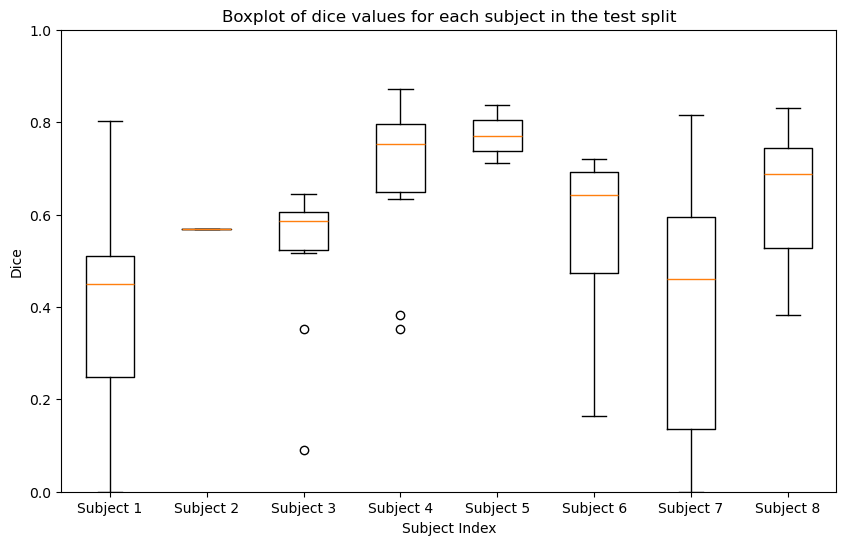

In [4]:
# Example data: a list of lists
data = Dice_for_subjects

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(data)

# Adding titles and labels
plt.title('Boxplot of dice values for each subject in the test split')
plt.xlabel('Subject Index')
plt.ylabel('Dice')

# Customize x-axis labels if needed
plt.xticks(range(1, len(data) + 1), ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])

# Set y-axis limits
plt.ylim(0, 1)

# Show the plot
plt.show()